In [3]:
# Nhập các thư viện cần thiết
from numpy import array
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Embedding, Dense

# Định nghĩa 10 đánh giá nhà hàng và nhãn tương ứng
reviews = [
    'Không bao giờ quay lại!',
    'Dịch vụ kinh khủng',
    'Nữ phục vụ thô lỗ',
    'Thức ăn lạnh',
    'Đồ ăn kinh khủng!',
    'Tuyệt vời',
    'Dịch vụ tuyệt vời!',
    'Tuyệt vời',
    'Công việc kém chất lượng',
    'Không thể làm tốt hơn'
]

# Định nghĩa nhãn
labels = array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

# Định nghĩa kích thước của từ vựng
Vocab_size = 50

# Mã hóa đánh giá sử dụng one-hot encoding
encoded_reviews = [one_hot(d, Vocab_size) for d in reviews]
print(f'encoded reviews: {encoded_reviews}')

# Định nghĩa độ dài tối đa của mỗi đánh giá sau khi được đệm
max_length = 4

# Đệm các đánh giá đã được mã hóa để có độ dài bằng nhau
padded_reviews = pad_sequences(encoded_reviews, maxlen=max_length, padding='post')
print(padded_reviews)

encoded reviews: [[17, 45, 24], [40, 35], [20, 24], [24, 44], [40, 44], [40], [40, 42], [46], [46, 32], [9, 1, 44, 7]]
[[17 45 24  0]
 [40 35  0  0]
 [20 24  0  0]
 [24 44  0  0]
 [40 44  0  0]
 [40  0  0  0]
 [40 42  0  0]
 [46  0  0  0]
 [46 32  0  0]
 [ 9  1 44  7]]


In [8]:
# Model 1: Sử dụng mô hình có lớp nhúng (Embedding Layer)

# Khởi tạo một mô hình Sequential
model = Sequential()

# Thêm lớp nhúng (Embedding Layer) vào mô hình
embedding_layer = Embedding(input_dim=Vocab_size, output_dim=8, input_length=max_length)
model.add(embedding_layer)

# Flatten dữ liệu để chuẩn bị cho lớp Dense
model.add(Flatten())

# Thêm lớp Dense với activation là sigmoid để thực hiện phân loại nhị phân
model.add(Dense(1, activation='sigmoid'))

# Biên soạn mô hình với bộ tối ưu 'adam' và hàm mất mát 'binary_crossentropy'
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

# Hiển thị cấu trúc của mô hình
print(model.summary())

# Huấn luyện mô hình trên dữ liệu đã được đệm và nhãn
history = model.fit(padded_reviews, labels, epochs=100, verbose=0)

# In kích thước của ma trận trọng số trong lớp nhúng
print(embedding_layer.get_weights()[0].shape)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 4, 8)              400       
                                                                 
 flatten_1 (Flatten)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 433 (1.69 KB)
Trainable params: 433 (1.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
(50, 8)


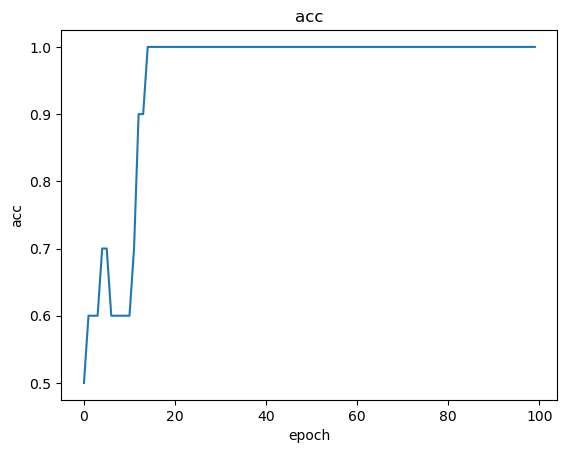

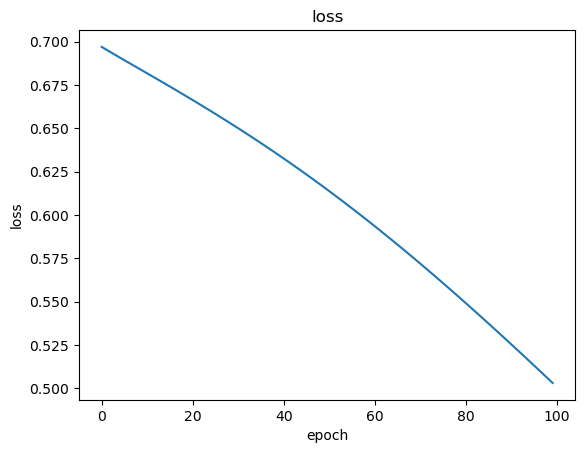

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.title('acc')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(history.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [13]:
# Model 2
from keras.layers import Dropout

model2 = Sequential()
embedding_layer = Embedding(input_dim=Vocab_size,output_dim=8,input_length=max_length)
model2.add(embedding_layer)
model2.add(Flatten())
model2.add(Dense(64,activation='relu'))
model2.add(Dense(32,activation='relu'))

model2.add(Flatten())
# Thêm lớp ẩn 
model2.add(Dense(128,activation='relu'))
# Thêm lớp dropout để tránh overfitting
model2.add(Dropout(0.5))

model2.add(Dense(1,activation='sigmoid'))

model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
print(model2.summary())

history2 = model2.fit(padded_reviews,labels,epochs=100,verbose=0)
print(embedding_layer.get_weights()[0].shape)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 4, 8)              400       
                                                                 
 flatten_4 (Flatten)         (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 flatten_5 (Flatten)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 128)               4224      
                                                                 
 dropout_1 (Dropout)         (None, 128)              

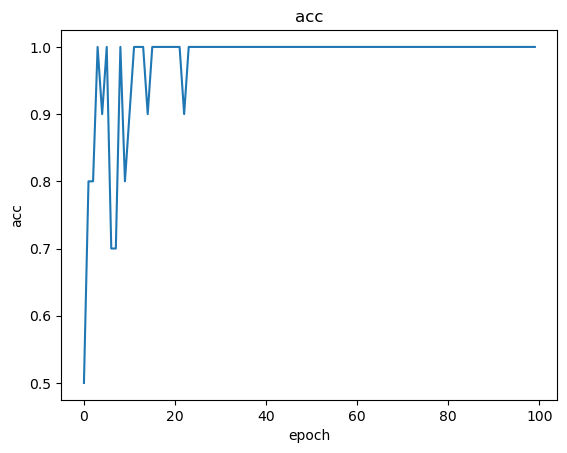

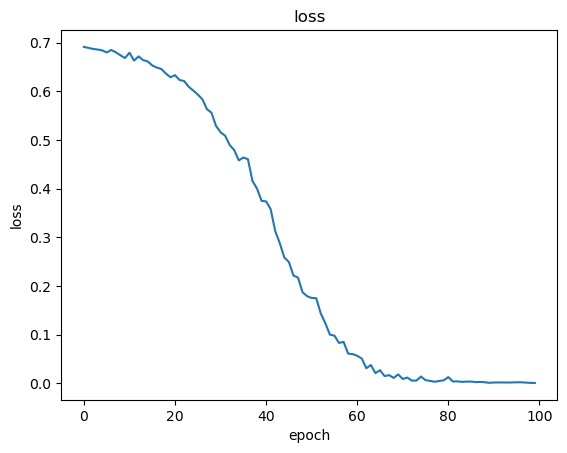

In [14]:
import matplotlib.pyplot as plt

plt.plot(history2.history['acc'])
plt.title('acc')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(history2.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [15]:
# Model 3
from keras.layers import Dropout

model3 = Sequential()
embedding_layer = Embedding(input_dim=Vocab_size,output_dim=8,input_length=max_length)
model3.add(embedding_layer)
model3.add(Flatten())

# Thêm lớp ẩn 
model3.add(Dense(128,activation='relu'))
# Thêm lớp dropout để tránh overfitting
model3.add(Dropout(0.5))

# Thêm lớp ẩn khác
model3.add(Dense(64,activation='relu'))
# Thêm lớp dropout khác
model3.add(Dropout(0.5))

model3.add(Dense(1,activation='sigmoid'))

model3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
print(model2.summary())

history3 = model3.fit(padded_reviews,labels,epochs=100,verbose=0)
print(embedding_layer.get_weights()[0].shape)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 4, 8)              400       
                                                                 
 flatten_4 (Flatten)         (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 flatten_5 (Flatten)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 128)               4224      
                                                                 
 dropout_1 (Dropout)         (None, 128)              

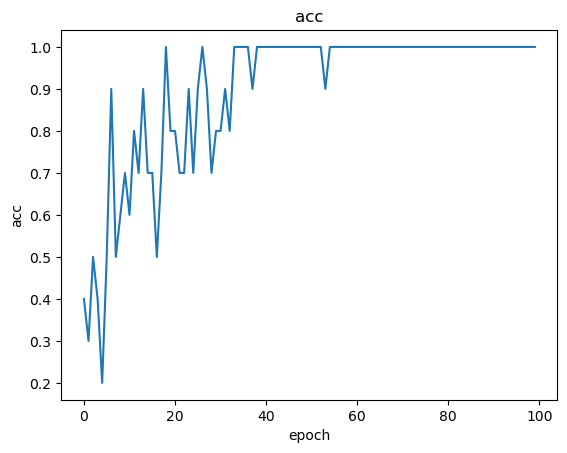

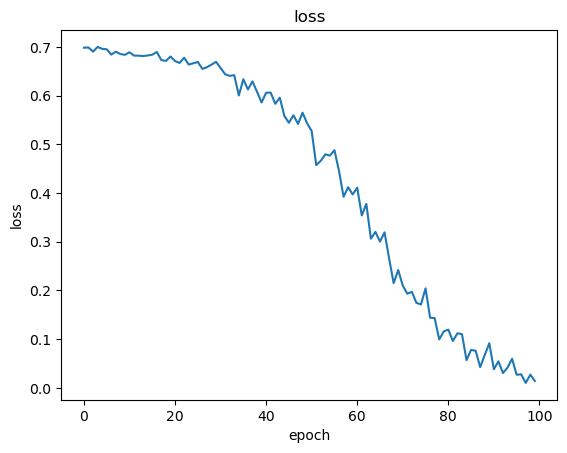

In [16]:
import matplotlib.pyplot as plt

plt.plot(history3.history['acc'])
plt.title('acc')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(history3.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()